In [15]:
import pandas as pd
from sqlalchemy import create_engine
import os
import matplotlib.pylab as plt
db_pass = os.environ['NFL_DB_PASS']
engine = create_engine('postgresql://postgres:{}@localhost:5432/nfl'.format(db_pass))
%matplotlib inline

In [16]:
ballsnap_pos = pd.read_sql("""
    select  ngs.season_year,
            ngs.gamekey,
            ngs.playid,
            ngs.x,
            ngs.y,
            ngs.gsisid,
            ngs.o,
            ngs.dis,
            ngs.dir,
            (ngs.dis * 20.4545) as mph,
            play_information.playdescription,
            play_information.home_team_visit_team,
            play_information.play_type,
            play_information.yardline,
            play_information.poss_team
    from ngs
    join play_information
    on ngs.season_year = play_information.season_year and
    ngs.gamekey = play_information.gamekey and
    ngs.playid = play_information.playid
    where ngs.event = 'ball_snap'
    """, engine)

In [17]:
ballsnap_pos.to_csv('../working/ballsnap_pos.csv')

In [18]:
ballsnap_pos.shape

(143431, 15)

In [19]:
ballsnap_pos.head()

,season_year,gamekey,playid,x,y,gsisid,o,dis,dir,mph,playdescription,home_team_visit_team,play_type,yardline,poss_team
0,2016.0,3.0,2643.0,60.950001,22.420000,30034.0,180.919998,0.23,283.739990,4.704535,(6:10) (Punt formation) S.Waters punts 36 yard...,BLT-CAR,Punt,CAR 49,CAR
1,2016.0,3.0,3949.0,4.810000,24.389999,24417.0,18.000000,0.00,93.720001,0.000000,(1:59) (Punt formation) S.Koch punts 44 yards ...,BLT-CAR,Punt,BLT 9,BLT
2,2016.0,3.0,3949.0,14.030000,22.790001,33078.0,17.280001,0.02,20.420000,0.409090,(1:59) (Punt formation) S.Koch punts 44 yards ...,BLT-CAR,Punt,BLT 9,BLT
3,2016.0,3.0,3949.0,17.809999,42.939999,30034.0,339.209991,0.06,106.019997,1.227270,(1:59) (Punt formation) S.Koch punts 44 yards ...,BLT-CAR,Punt,BLT 9,BLT
4,2016.0,3.0,3949.0,17.219999,26.110001,32386.0,351.200012,0.05,288.480011,1.022725,(1:59) (Punt formation) S.Koch punts 44 yards ...,BLT-CAR,Punt,BLT 9,BLT


In [20]:
grouped = ballsnap_pos.groupby(['season_year', 'gamekey', 'playid'])

In [95]:
d['home_team'] = d['home_team_visit_team'].str[:3]
d['yardline_int'] = d['yardline'].str[-3:].astype('int')
d['x_flipped'] = d.apply(lambda x: -1*x['x'] if x['poss_team'] == x['home_team'] else x['x'], axis=1)

In [105]:
d['home_team_visit_team'].values[0]

'BLT-CAR'

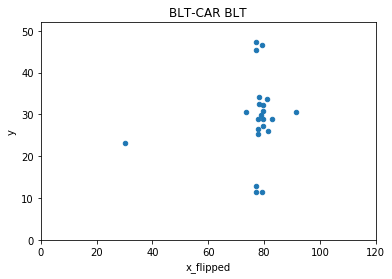

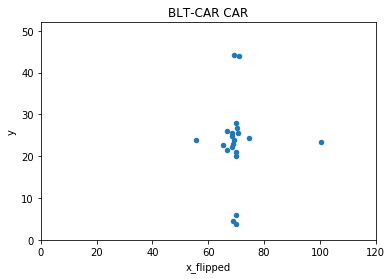

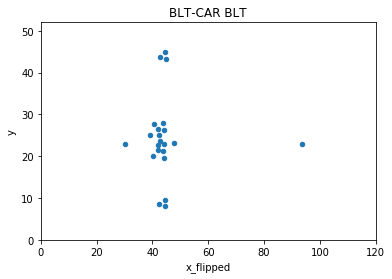

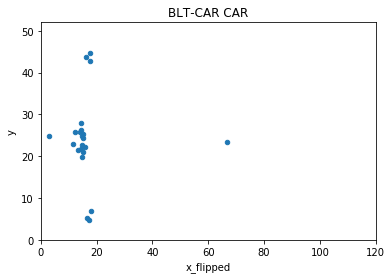

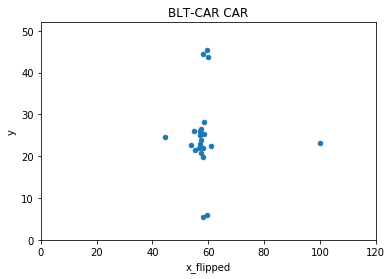

In [115]:
count = 0
for i, d in grouped:
    d = d.copy()
    d['home_team'] = d['home_team_visit_team'].str[:3]
    d['yardline_int'] = d['yardline'].str[-2:].astype('int')
    d['x_flipped'] = d.apply(lambda x: 120-x['x'] if x['poss_team'] == x['home_team'] else x['x'], axis=1)
    d.plot(kind='scatter', x='x_flipped', y='y', title=d['home_team_visit_team'].values[0] + ' ' + d['poss_team'].values[0], xlim=(0,120), ylim=(0,52))
    count += 1
    if count == 5:
        break

In [24]:
d.head()

,season_year,gamekey,playid,x,y,gsisid,o,dis,dir,mph,playdescription,home_team_visit_team,play_type,yardline,poss_team
89,2016.0,3.0,455.0,28.420000,30.480000,24417.0,24.030001,0.01,112.440002,0.204545,(6:44) (Punt formation) S.Koch punts 54 yards ...,BLT-CAR,Punt,BLT 32,BLT
90,2016.0,3.0,455.0,40.810001,46.650002,33019.0,349.750000,0.05,181.729996,1.022725,(6:44) (Punt formation) S.Koch punts 54 yards ...,BLT-CAR,Punt,BLT 32,BLT
91,2016.0,3.0,455.0,40.810001,11.450000,32770.0,19.450001,0.11,175.830002,2.249995,(6:44) (Punt formation) S.Koch punts 54 yards ...,BLT-CAR,Punt,BLT 32,BLT
92,2016.0,3.0,455.0,41.009998,29.940001,27557.0,4.130000,0.13,246.779999,2.659085,(6:44) (Punt formation) S.Koch punts 54 yards ...,BLT-CAR,Punt,BLT 32,BLT
93,2016.0,3.0,455.0,40.230000,32.340000,30458.0,6.660000,0.06,288.829987,1.227270,(6:44) (Punt formation) S.Koch punts 54 yards ...,BLT-CAR,Punt,BLT 32,BLT


In [84]:
def plot_formation(d):
    """
    Plots the player formations at the snap for a given play
    """
    d.plot(kind='scatter', x='x', y='y')
    plt.show()

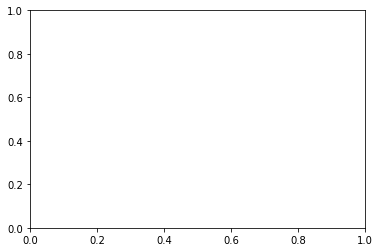

In [61]:
fig, ax = plt.subplots()
for row in d.itertuples():
    x = row[4]
    y = row[5]
    circle = plt.Circle((x, y))
    ax.add_artist(circle)
fig.

In [69]:
fig = plt.figure(figsize=(15, 5))
for row in d.itertuples():
    x = row[4]
    y = row[5]
    plt.Circle((x, y), color='r')
plt.show()

<Figure size 1080x360 with 0 Axes>

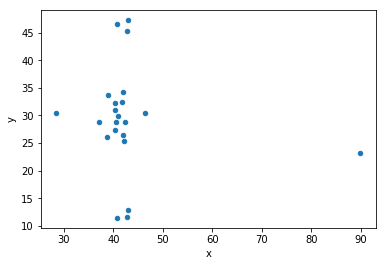

In [71]:
d.plot(kind='scatter', x='x', y='y')

In [81]:
d['yardline_int'] = d['yardline'].str[-3:].astype('int')

In [83]:
d

,season_year,gamekey,playid,x,y,gsisid,o,dis,dir,mph,playdescription,home_team_visit_team,play_type,yardline,poss_team,yardline_int
89,2016.0,3.0,455.0,28.420000,30.480000,24417.0,24.030001,0.01,112.440002,0.204545,(6:44) (Punt formation) S.Koch punts 54 yards ...,BLT-CAR,Punt,BLT 32,BLT,32
90,2016.0,3.0,455.0,40.810001,46.650002,33019.0,349.750000,0.05,181.729996,1.022725,(6:44) (Punt formation) S.Koch punts 54 yards ...,BLT-CAR,Punt,BLT 32,BLT,32
91,2016.0,3.0,455.0,40.810001,11.450000,32770.0,19.450001,0.11,175.830002,2.249995,(6:44) (Punt formation) S.Koch punts 54 yards ...,BLT-CAR,Punt,BLT 32,BLT,32
92,2016.0,3.0,455.0,41.009998,29.940001,27557.0,4.130000,0.13,246.779999,2.659085,(6:44) (Punt formation) S.Koch punts 54 yards ...,BLT-CAR,Punt,BLT 32,BLT,32
93,2016.0,3.0,455.0,40.230000,32.340000,30458.0,6.660000,0.06,288.829987,1.227270,(6:44) (Punt formation) S.Koch punts 54 yards ...,BLT-CAR,Punt,BLT 32,BLT,32
94,2016.0,3.0,455.0,41.730000,32.389999,31596.0,184.070007,0.10,248.009995,2.045450,(6:44) (Punt formation) S.Koch punts 54 yards ...,BLT-CAR,Punt,BLT 32,BLT,32
95,2016.0,3.0,455.0,46.389999,30.500000,31875.0,174.839996,0.03,139.509995,0.613635,(6:44) (Punt formation) S.Koch punts 54 yards ...,BLT-CAR,Punt,BLT 32,BLT,32
96,2016.0,3.0,455.0,42.840000,47.250000,32891.0,184.529999,0.04,139.759995,0.818180,(6:44) (Punt formation) S.Koch punts 54 yards ...,BLT-CAR,Punt,BLT 32,BLT,32
97,2016.0,3.0,455.0,42.169998,25.299999,29731.0,209.919998,0.15,260.589996,3.068175,(6:44) (Punt formation) S.Koch punts 54 yards ...,BLT-CAR,Punt,BLT 32,BLT,32
98,2016.0,3.0,455.0,42.740002,11.560000,27853.0,177.080002,0.04,169.089996,0.818180,(6:44) (Punt formation) S.Koch punts 54 yards ...,BLT-CAR,Punt,BLT 32,BLT,32
